In [1]:
import os
import fnmatch
import string
import shutil
import random

import pandas as pd

import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pickle

In [2]:
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result



In [4]:
rand=find('*.rand', '/home/gabnmr/Documents/NMR_demo')
rand

['/home/gabnmr/Documents/NMR_demo/GTAC_Me (copy)/Run_0/Mardi/GTAC_Me_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_Me (copy)/Run_0/Mardi/old_rand/GTAC_Me_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_prior to Amber and  parallel control/Run_0/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_prior to Amber and  parallel control/Run_1/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_prior to Amber and  parallel control/Run_2/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_prior to Amber and  parallel control/Run_3/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_t_prev/Run_0/Mardi/GTAC_t_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_t_prev/Run_0/Mardi/old_rand/GTAC_t_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/inp/GTAC_Me_inp_missing_atom/1/GTAC_Me_II.rand',
 '/home/gabnmr/Documents/NMR_demo/inp/GTAC_Me_inp_missing_atom/other/GTAC_Me_II_2.rand',
 '/home/gabnmr/Documents/NMR_demo/

In [42]:
print(rand[5])
df=pd.read_csv(rand[5],delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
df
org=df
org['i'] = org['i'].astype(str)
org['j'] = org['j'].astype(str)
# org.dtypes

/home/gabnmr/Documents/NMR_demo/GTAC_t_prev/Run_0/Mardi/old_rand/GTAC_t_corma.rand


/tmp/ipykernel_4557/3076714913.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv(rand[5],delim_whitespace=True,index_col=False,engine='python',skipfooter=4)


In [43]:
org['Name'] = org[["ATOM-", "i","ATOM-.1","j"]].apply(lambda x: "".join(x), axis =1)
# org['indx'] = org.index
# org
# org=org.set_index('Name')

In [58]:
focus=[]
dist=[]
data_x=org
for x in range(len(org)):#(384):
    atm1=data_x.iat[x,0]
    res1=data_x.iat[x,1]
    atm2=data_x.iat[x,2]
    res2=data_x.iat[x,3]
    #print(res1,atm1)
    if "M" in atm1:
        atm1=atm1.replace("M","H")+"1"
    if "M" in atm2:
        atm2=atm2.replace("M","H")+"1"
        
    #dist="focus"+" "+":"+res1+"@"+atm1+" "+":"+res2+"@"+atm2
    focus.append("distance"+" "+":"+res1+"@"+atm1+" "+":"+res2+"@"+atm2)
    dist.append("distance"+" "+res1+atm1+" "+res2+atm2+" "+":"+res1+"@"+atm1+" "+":"+res2+"@"+atm2)#+" "+"out "+"test_output.txt")

In [199]:
i=0
string_to_clipboard=""
with open('chimera_vis.txt', 'w') as f:
    for each in focus:
        f.write(each)
        f.write('\n')
    # i=i+1
    # print(each)
    
    string_to_clipboard+=each+"/n "
# print(string_to_clipboard)
lines = ['Readme', 'How to write text files in Python']
with open('readme.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

In [70]:
# string_to_clipboard

# Compare Runs 0-3

In [151]:
rand=find('*.rand', '/home/gabnmr/Documents/NMR_demo')
print(len(rand))
print(rand[30],rand[11],rand[13],rand[15],rand[17])
# rand[11]

33
/home/gabnmr/Documents/NMR_demo/GTAC_iPrd/Run_0/Mardi/GTAC_iPrd_corma.rand /home/gabnmr/Documents/NMR_demo/GTAC_iPr_save_results/Run_0/Mardi/GTAC_iPr_corma.rand /home/gabnmr/Documents/NMR_demo/GTAC_iPr_save_results/Run_1/Mardi/GTAC_iPr_corma.rand /home/gabnmr/Documents/NMR_demo/GTAC_iPr_save_results/Run_2/Mardi/GTAC_iPr_corma.rand /home/gabnmr/Documents/NMR_demo/GTAC_iPr_save_results/Run_3/Mardi/GTAC_iPr_corma.rand


In [162]:
listrand=[rand[30],rand[11],rand[13],rand[15],rand[17]]

dff=pd.read_csv(rand[30],delim_whitespace=True,index_col=False,engine='python',skipfooter=4)

dff['i'] = dff['i'].astype(str)
dff['j'] = dff['j'].astype(str)

dff['Name'] = dff[["ATOM-", "i","ATOM-.1","j"]].apply(lambda x: "".join(x), axis =1)
dff['indx'] = dff.index

dff=dff.set_index('Name')
for i in listrand[1:5]:#rand[1:4]:

    df=pd.read_csv(i,delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
    df
    org=df
    org['i'] = org['i'].astype(str)
    org['j'] = org['j'].astype(str)
    # org.dtypes
    org['Name'] = org[["ATOM-", "i","ATOM-.1","j"]].apply(lambda x: "".join(x), axis =1)
    org['indx'] = org.index
    org
    org=org.set_index('Name')
    print(len(org))
    # dff.join(org)
    # pd.concat([dff, org], axis=1)
    # pd.merge(dff, org, left_index=True, right_index=True)
    dff=pd.concat([dff, org],axis=1)
dff
# org

384
384
383
384


/tmp/ipykernel_4557/3608975148.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  dff=pd.read_csv(rand[30],delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
/tmp/ipykernel_4557/3608975148.py:14: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv(i,delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
/tmp/ipykernel_4557/3608975148.py:14: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv(i,delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
/tmp/ipykernel_4557/3608975148.py:14: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv(i,delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
/

,ATOM-,i,ATOM-.1,j,low,up,center,width,indx,ATOM-,...,indx,ATOM-,i,ATOM-.1,j,low,up,center,width,indx
Name,,,,,,,,,,,,,,,,,,,,,
H61H1'1,H6,1,H1',1,3.07,4.19,3.630,1.12,0.0,H6,...,0.0,H6,1,H1',1,3.02,4.15,3.585,1.13,0
H2'1H61,H2',1,H6,1,2.34,3.27,2.805,0.93,1.0,H2',...,1.0,H2',1,H6,1,2.29,3.21,2.750,0.92,1
H2'1H3'1,H2',1,H3',1,2.48,3.81,3.145,1.33,2.0,H2',...,2.0,H2',1,H3',1,2.35,3.71,3.030,1.36,2
H2''1H61,H2'',1,H6,1,2.84,4.77,3.805,1.93,3.0,H2'',...,3.0,H2'',1,H6,1,2.75,4.62,3.685,1.87,3
H1'2H4'2,H1',2,H4',2,3.10,4.27,3.685,1.17,4.0,H1',...,4.0,H1',2,H4',2,3.01,4.19,3.600,1.18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H7325HN725,H73,25,HN7,25,2.70,2.77,2.735,0.07,379.0,H73,...,379.0,H73,25,HN7,25,2.54,2.56,2.550,0.02,380
H8325H15,H83,25,H1,5,3.78,3.97,3.875,0.19,380.0,H83,...,380.0,H83,25,H1,5,3.61,3.87,3.740,0.26,381
H8325HN725,H83,25,HN7,25,3.61,3.83,3.720,0.22,381.0,H83,...,381.0,H83,25,HN7,25,3.46,3.73,3.595,0.27,382


In [158]:
for i in listrand:#rand[:4]:

    df=pd.read_csv(i,delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
    if i == listrand[0]:
        dff=df
        continue
    dff=pd.concat([dff, df],axis=1)

dff

/tmp/ipykernel_4557/3971000978.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv(i,delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
/tmp/ipykernel_4557/3971000978.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv(i,delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
/tmp/ipykernel_4557/3971000978.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv(i,delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
/tmp/ipykernel_4557/3971000978.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv(i,delim_whitespace=True,index_col=False,engine='python',skipfooter=4)
/tmp/ipykern

,ATOM-,i,ATOM-.1,j,low,up,center,width,ATOM-,i,...,center,width,ATOM-,i,ATOM-.1,j,low,up,center,width
0,H6,1.0,H1',1.0,3.07,4.19,3.630,1.12,H6,1,...,3.585,1.13,H6,1,H1',1,3.02,4.15,3.585,1.13
1,H2',1.0,H6,1.0,2.34,3.27,2.805,0.93,H2',1,...,2.765,0.93,H2',1,H6,1,2.29,3.21,2.750,0.92
2,H2',1.0,H3',1.0,2.48,3.81,3.145,1.33,H2',1,...,3.075,1.27,H2',1,H3',1,2.35,3.71,3.030,1.36
3,H2'',1.0,H6,1.0,2.84,4.77,3.805,1.93,H2'',1,...,3.755,1.93,H2'',1,H6,1,2.75,4.62,3.685,1.87
4,H1',2.0,H4',2.0,3.10,4.27,3.685,1.17,H1',2,...,3.605,1.17,H1',2,H4',2,3.01,4.19,3.600,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,H73,25.0,HN7,25.0,2.70,2.77,2.735,0.07,H73,25,...,2.540,0.02,H73,25,HN2,25,3.34,3.51,3.425,0.17
380,H83,25.0,H1,5.0,3.78,3.97,3.875,0.19,H73,25,...,3.700,0.24,H73,25,HN7,25,2.54,2.56,2.550,0.02
381,H83,25.0,HN7,25.0,3.61,3.83,3.720,0.22,H83,25,...,3.560,0.24,H83,25,H1,5,3.61,3.87,3.740,0.26
382,M86,25.0,HN7,25.0,4.37,4.86,4.615,0.49,H83,25,...,4.585,0.43,H83,25,HN7,25,3.46,3.73,3.595,0.27


In [159]:
dff.to_csv("name.csv")

In [164]:
dff

,ATOM-,i,ATOM-.1,j,low,up,center,width,indx,ATOM-,...,indx,ATOM-,i,ATOM-.1,j,low,up,center,width,indx
Name,,,,,,,,,,,,,,,,,,,,,
H61H1'1,H6,1,H1',1,3.07,4.19,3.630,1.12,0.0,H6,...,0.0,H6,1,H1',1,3.02,4.15,3.585,1.13,0
H2'1H61,H2',1,H6,1,2.34,3.27,2.805,0.93,1.0,H2',...,1.0,H2',1,H6,1,2.29,3.21,2.750,0.92,1
H2'1H3'1,H2',1,H3',1,2.48,3.81,3.145,1.33,2.0,H2',...,2.0,H2',1,H3',1,2.35,3.71,3.030,1.36,2
H2''1H61,H2'',1,H6,1,2.84,4.77,3.805,1.93,3.0,H2'',...,3.0,H2'',1,H6,1,2.75,4.62,3.685,1.87,3
H1'2H4'2,H1',2,H4',2,3.10,4.27,3.685,1.17,4.0,H1',...,4.0,H1',2,H4',2,3.01,4.19,3.600,1.18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H7325HN725,H73,25,HN7,25,2.70,2.77,2.735,0.07,379.0,H73,...,379.0,H73,25,HN7,25,2.54,2.56,2.550,0.02,380
H8325H15,H83,25,H1,5,3.78,3.97,3.875,0.19,380.0,H83,...,380.0,H83,25,H1,5,3.61,3.87,3.740,0.26,381
H8325HN725,H83,25,HN7,25,3.61,3.83,3.720,0.22,381.0,H83,...,381.0,H83,25,HN7,25,3.46,3.73,3.595,0.27,382


In [165]:
dff=dff.dropna()

In [166]:
dff

,ATOM-,i,ATOM-.1,j,low,up,center,width,indx,ATOM-,...,indx,ATOM-,i,ATOM-.1,j,low,up,center,width,indx
Name,,,,,,,,,,,,,,,,,,,,,
H61H1'1,H6,1,H1',1,3.07,4.19,3.630,1.12,0.0,H6,...,0.0,H6,1,H1',1,3.02,4.15,3.585,1.13,0
H2'1H61,H2',1,H6,1,2.34,3.27,2.805,0.93,1.0,H2',...,1.0,H2',1,H6,1,2.29,3.21,2.750,0.92,1
H2'1H3'1,H2',1,H3',1,2.48,3.81,3.145,1.33,2.0,H2',...,2.0,H2',1,H3',1,2.35,3.71,3.030,1.36,2
H2''1H61,H2'',1,H6,1,2.84,4.77,3.805,1.93,3.0,H2'',...,3.0,H2'',1,H6,1,2.75,4.62,3.685,1.87,3
H1'2H4'2,H1',2,H4',2,3.10,4.27,3.685,1.17,4.0,H1',...,4.0,H1',2,H4',2,3.01,4.19,3.600,1.18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H7325HN225,H73,25,HN2,25,3.57,3.78,3.675,0.21,378.0,H73,...,378.0,H73,25,HN2,25,3.34,3.51,3.425,0.17,379
H7325HN725,H73,25,HN7,25,2.70,2.77,2.735,0.07,379.0,H73,...,379.0,H73,25,HN7,25,2.54,2.56,2.550,0.02,380
H8325H15,H83,25,H1,5,3.78,3.97,3.875,0.19,380.0,H83,...,380.0,H83,25,H1,5,3.61,3.87,3.740,0.26,381


In [174]:
x_true=dff.iloc[:,i]
x_true
#3 4 5 low upper center

Name
H61H1'1       3.07
H2'1H61       2.34
H2'1H3'1      2.48
H2''1H61      2.84
H1'2H4'2      3.10
              ... 
H7325HN225    3.57
H7325HN725    2.70
H8325H15      3.78
H8325HN725    3.61
M8625HN725    4.37
Name: low, Length: 382, dtype: float64

In [56]:
dff=pd.read_csv("del_runs0123.csv")
dff

,Unnamed: 0,Unnamed: 1,ATOM-,i,ATOM-.1,j,low,up,center,width,...,center.3,width.3,ATOM-.5,i.4,ATOM-.1.4,j.4,low.4,up.4,center.4,width.4
0,0,True,H6,1,H1',1,3.07,4.19,3.630,1.12,...,3.585,1.13,H6,1,H1',1,3.02,4.15,3.585,1.13
1,1,True,H2',1,H6,1,2.34,3.27,2.805,0.93,...,2.765,0.93,H2',1,H6,1,2.29,3.21,2.750,0.92
2,2,True,H2',1,H3',1,2.48,3.81,3.145,1.33,...,3.075,1.27,H2',1,H3',1,2.35,3.71,3.030,1.36
3,3,True,H2'',1,H6,1,2.84,4.77,3.805,1.93,...,3.755,1.93,H2'',1,H6,1,2.75,4.62,3.685,1.87
4,4,True,H1',2,H4',2,3.10,4.27,3.685,1.17,...,3.605,1.17,H1',2,H4',2,3.01,4.19,3.600,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,379,True,H73,25,HN2,25,3.57,3.78,3.675,0.21,...,3.405,0.15,H73,25,HN2,25,3.34,3.51,3.425,0.17
378,380,True,H73,25,HN7,25,2.70,2.77,2.735,0.07,...,2.540,0.02,H73,25,HN7,25,2.54,2.56,2.550,0.02
379,381,True,H83,25,H1,5,3.78,3.97,3.875,0.19,...,3.700,0.24,H83,25,H1,5,3.61,3.87,3.740,0.26
380,382,True,H83,25,HN7,25,3.61,3.83,3.720,0.22,...,3.560,0.24,H83,25,HN7,25,3.46,3.73,3.595,0.27


0
1
2
3
4
['rund', 0.029192408376963346, 0.9420403091816097]
['run0', 0.013159162303664918, 0.9737985636337821]
['run1', 0.010769895287958117, 0.9792918309264872]
['run2', 0.009523560209424086, 0.9815616781843223]
['run3', 0.0, 1.0]


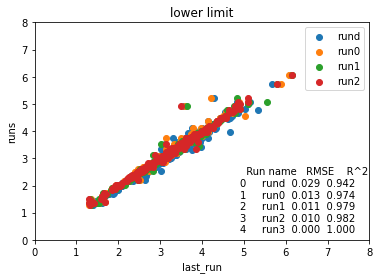

0
1
2
3
4
['rund', 0.26376256544502613, 0.7968424690894036]
['run0', 0.3032455497382199, 0.7887374137342261]
['run1', 0.23055811518324612, 0.8371106082289569]
['run2', 0.19786596858638744, 0.8609297972141956]
['run3', 0.0, 1.0]


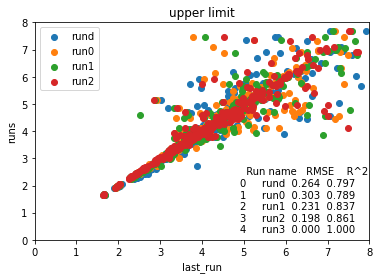

0
1
2
3
4
['rund', 0.08395222513089005, 0.885439273693207]
['run0', 0.08543010471204189, 0.8887170546966829]
['run1', 0.06611747382198953, 0.9154029313370529]
['run2', 0.058370157068062825, 0.9257769559662747]
['run3', 0.0, 1.0]


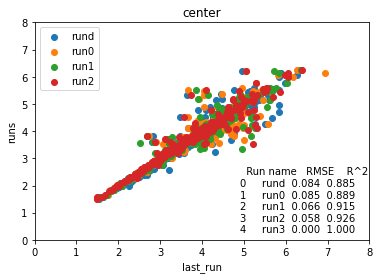

0
1
2
3
4
['rund', 0.25010104712041886, 0.6282084607050757]
['run0', 0.29108900523560205, 0.6381825718765068]
['run1', 0.21818612565445025, 0.7070477699348536]
['run2', 0.18129842931937173, 0.7526324229822319]
['run3', 0.0, 1.0]


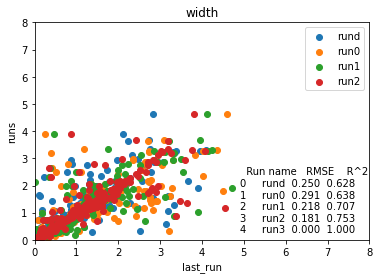

In [77]:
# n=[6,7,8,9]
i=8
nn=0
for i in range(6,10):
    rund=dff.iloc[:,i]
    rund
    run0=dff.iloc[:,i+8]
    run0
    run1=dff.iloc[:,i+8*2]
    run1
    run2=dff.iloc[:,i+8*3]
    run2
    run3=dff.iloc[:,i+8*4]
    run3
    list_stats=[]
    list_names=[rund,run0,run1,run2,run3]
    list_namess=["rund","run0","run1","run2","run3"]
    list_dist=["lower limit","upper limit","center","width"]
    # print(rund)
    n=0
    for run in list_names:
        print(n)
        rmse=sklearn.metrics.mean_squared_error(run, run3)
        r2=sklearn.metrics.r2_score(run, run3)
        list_inp=[list_namess[n],rmse,r2]
        list_stats.append(list_inp)
        if not list_namess[n]=="run3":
            plt.scatter(run, run3)
        n=n+1
    # plt.scatter(y_pred2, y_pred)
    # plt.scatter(y_pred2, x_true)
    for stats in list_stats:
        print(stats)
    df_list_stats = pd.DataFrame(list_stats, columns = ['Run name', 'RMSE','R^2']).round(3)
    plt.xlim([0, 8])
    plt.ylim([0, 8])
    plt.xlabel('last_run')
    plt.ylabel('runs')
    plt.legend(['rund', 'run0', 'run1', 'run2'])
    plt.title(list_dist[nn])
    plt.figtext(0.6,0.15, df_list_stats.to_string())
    plt.savefig("Recycling_impact_{}.png".format(list_dist[nn]))
    plt.show()
    nn=nn+1

In [61]:
list_stats
df_list_stats = pd.DataFrame(list_stats, columns = ['Run name', 'RMSE','R^2']).round(3)
df_list_stats

,Run name,RMSE,R^2
0,rund,0.250,0.628
1,run0,0.291,0.638
2,run1,0.218,0.707
3,run2,0.181,0.753
4,run3,0.000,1.000


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

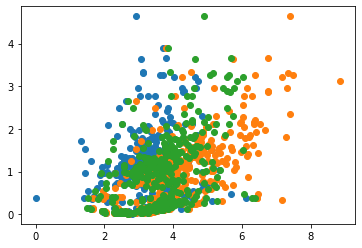

In [19]:
# dff["center"] = pd.to_numeric(dff["center"])
# dff.dtypes
# dff=pd.DataFrame.("name.csv")
i=6
rund=dff.iloc[:,i]
rund
run0=dff.iloc[:,i+7]
run0
run1=dff.iloc[:,i+7*2]
run1
run2=dff.iloc[:,i+7*3]
run2
# run3=dff.iloc[:,i+7*4]
# run3
# # i=i+1

list_stats=[]
list_names=[rund,run0,run1,run2,run3]
list_namess=["rund","run0","run1","run2","run3"]
i=0
for run in list_names:
    
    rmse=sklearn.metrics.mean_squared_error(run, run3)
    r2=sklearn.metrics.r2_score(run, run3)
    list_inp=[list_namess[i],rmse,r2]
    list_stats.append(list_inp)
    if not list_namess[i]=="run3":
        plt.scatter(run, run3)
    i=i+1
# plt.scatter(y_pred2, y_pred)
# plt.scatter(y_pred2, x_true)
for stats in list_stats:
    print(stats)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.xlabel('last_run')
plt.ylabel('runs')
plt.legend(['rund', 'run0', 'run1', 'run2'])
plt.show()
# print(x_true-y_pred)

195.6214607329843 175.78714554973826
-2.107449732143673 -1.7923813486826208


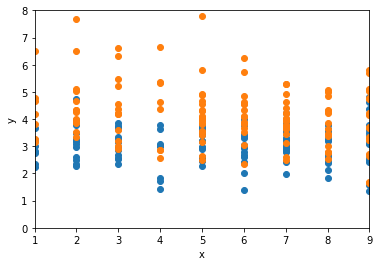

Name
H61H1'1       1.18
H2'1H61       1.03
H2'1H3'1      1.47
H2''1H61      2.00
H1'2H4'2      1.29
              ... 
H7325HN225    0.38
H7325HN725    0.22
H8325H15      0.37
H8325HN725    0.41
M8625HN725    0.72
Length: 382, dtype: float64


In [167]:
# dff["center"] = pd.to_numeric(dff["center"])
# dff.dtypes
i=5
x_true=dff.iloc[:,i]
x_true
y_pred=dff.iloc[:,i+8]
y_pred
y_pred2=dff.iloc[:,i+8*2]
# # i=i+1
rmse=sklearn.metrics.mean_squared_error(y_pred2, y_pred)
r2=sklearn.metrics.r2_score(y_pred2, y_pred)
rmse1=sklearn.metrics.mean_squared_error(y_pred2, x_true)
r21=sklearn.metrics.r2_score(y_pred2, x_true)
print(rmse, rmse1)
print(r2, r21)

plt.scatter(y_pred2, y_pred)
plt.scatter(y_pred2, x_true)

plt.xlim([0, 8])
plt.ylim([0, 8])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(x_true-y_pred)

In [ ]:
i=0
for df in testing_list:
    zf=zf_list[i]
    dfff["center{}".format(zf)] = pd.to_numeric(dfff["center{}".format(zf)])
    x_true=dfff["center"]
    y_pred=dfff["center{}".format(zf)]
    i=i+1
    #rmse=sklearn.metrics.mean_squared_error(x_true, y_pred)
    #r2=sklearn.metrics.r2_score(x_true, y_pred)
    #print(rmse)
    #print(r2)
    
    plt.scatter(x_true, y_pred)
    plt.xlim([0, 8])
    plt.ylim([0, 8])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [17]:
def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

In [21]:
find_all('GTAC_iPr_corma.rand', '/home/gabnmr/Documents/NMR_demo')

['/home/gabnmr/Documents/NMR_demo/GTAC_iPr_prior to Amber and  parallel control/Run_0/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_prior to Amber and  parallel control/Run_1/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_prior to Amber and  parallel control/Run_2/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_prior to Amber and  parallel control/Run_3/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_save/Run_0/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_save/Run_0/Mardi/old_rand/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_save/Run_1/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_save/Run_1/Mardi/old_rand/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_save/Run_2/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr_save/Run_3/Mardi/GTAC_iPr_corma.rand',
 '/home/gabnmr/Documents/NMR_demo/

In [9]:
os.chdir('/home/gabnmr/Documents/NMR_demo/')
cwd = os.getcwd()
cwd

'/home/gabnmr/Documents/NMR_demo'

def fac(var1):
    v=1
    if int(var1) >= 1:
        for i in range (1,int(var1)+1):
               v = v * i
    return v

N_C=[]
n=323#num of peaks
for f in fr:
    r=int(n*(1-f))
    print(r)
    c=int(fac(n)/(fac(r)*fac(n-r)))
    N_C.append(c)
N_C

fr=[0.1,0.2,0.3,0.5,0.6,0.8,0.9,0.95]
# name = [ value * 100 for value in fr]
# name = map(str,map(int,name))
# print(str(int(value * 100)))

os.chdir("/home/gabnmr/Documents/ivan/Mardi")
cwd = os.getcwd()
print(cwd)
file_name = ["H2O_250ms.INT.1","D2O_250ms.INT.1","D2O_200ms.INT.1","D2O_150ms.INT.1","D2O_100ms.INT.1"]
var_run="run"

#mkdir for runs 1 to 20 where we are going to run random seeds and elimite % of the 323 restraints/or peak intensities in the int files

#NB! it might be a good idea to find the file with th emost number of restaitns remove  certain labels from it and based on it remove the same labels from the other files.(Future work) or now)
os.chdir(cwd)
for value in fr:
    os.chdir(cwd)
    name = str(int(value * 100))
    if not os.path.exists(name):
        os.mkdir(name)
    p=0
    os.chdir(name)
    while p<20:
        p+=1
        if not os.path.exists((var_run+str(p))):
            os.mkdir((var_run+str(p)))

#copy cp_src_files.sh to copy all necessary files to run a simulated mardigras on the GTAC-IPr NMR assingment. format the INT1 file to have not
#blank space. then we need to call a scvript to again run through the name directoris and var_rung+str(p) while p<20  and modify all int files

# then we will run the gnu paralle with find ./run.sh script
os.chdir(cwd)
for value in fr:
    os.chdir(cwd)
    name = str(int(value * 100))
    p=0
    while p<20:
        p+=1
        shutil.copy("cp_src_files.sh", cwd+"/"+name+"/"+(var_run+str(p)))
        os.chdir(cwd+"/"+name+"/"+(var_run+str(p)))
        os.system("./cp_src_files.sh")
        os.system("sed -i '/^$/d' *.INT.1")
        os.chdir(cwd)

x=random.seed(30)
print(x)
random.seed(x)
print(random.randint(3,100))

os.chdir(cwd)
for value in fr:
    name = str(int(value * 100))
    p=0
    while p<20:
        p+=1
        os.chdir(cwd+"/"+name+"/"+(var_run+str(p)))
        for fn in file_name:
            with open(fn, 'r') as fp:
                for count, line in enumerate(fp):
                    pass
                #print(count+1)
                t_lines= count + 1
            #n_lines = str(os.system("wc -l {}".format(fn))).split(" ")
            random.seed()
            random.randint(3,t_lines)


            l = random.sample(range(4,t_lines), int(t_lines*value))
            #print(l)
            #print((cwd+"/"+name+"/"+(var_run+str(p))))
            zz = ''.join(str(l))
            zz= zz.replace(", ","d;")
            zz= zz.replace("[","'")
            zz= zz.replace("]","d'")
            #zz = ''.join(str(x) for x in xs)
            os.system('sed -e {} {} >> Mod_{}'.format(zz,fn,fn))
            #os.system('mkdir Mod_{}'.format(fn))
            # randomlist = []
            # limit=int(fr*t_lines)
            #     for i in range(0,limit):
            #     n = random.randint(3,t_lines)
            #     randomlist.append(n)
            #     print(randomlist)

            #print(n_lines)
    

#swap mod labels with regular int1 files and the original ones save as _saved.
for value in fr:
    name = str(int(value * 100))
    p=0
    while p<20:
        p+=1
        os.chdir(cwd+"/"+name+"/"+(var_run+str(p)))
        for fn in file_name:
            os.system('mv {} {}_saved'.format(fn,fn))
            os.system('mv Mod_{} {}'.format(fn,fn))     
       

#prior to analysis rung the mardigras calcualtions

#for analysis def funciton to iterate over folrder

# for value in fr:
#     name = str(int(value * 100))
#     p=0
#     while p<20:
#         p+=1
#         os.chdir(cwd+"/"+name+"/"+(var_run+str(p)))

# in the analysis each restra from each folder will be a var dataframe
# there will be a constant dataframe
#after sorting and conbining the two, run nan remove
#plot and save plots with R2 RMSD, MAX error MEA bias eatc.
#make list and save statistics for 
# report from list of statistics compute the means  and std deviations over the 20 runs for each sample size
#plot the average + sd against the % assigned peaks
# calculate the % error from the final computed and categorise them how many are in the 10% error 20% error etc. and categorise the, by  distance 

def path(var1):
    
    os.chdir(cwd)
    for value in fr:
        os.chdir(cwd)
        name = str(int(value * 100))
        if not os.path.exists(name):
            os.mkdir(name)
        p=0
        os.chdir(name)
        while p<20:
            p+=1
            
            if not os.path.exists((var_run+str(p))):
                os.mkdir((var_run+str(p)))
            
            os.chdir(cwd+"/"+name+"/"+(var_run+str(p)))
            pth=name+var_run+str(p)
            return  pth
    # v=1
    # if int(var1) >= 1:
    #     for i in range (1,int(var1)+1):
    #            v = v * i
    # return v

df_dict={}
os.chdir(cwd)
fr2=[0.1,0.2,0.3,0.5,0.6,0.8,0.9]
for value in fr2:
    #if value == 0.0:
        name = str(int(value * 100))
        if value == 0.0:
            name="00"
        p=0
        os.chdir(name)
        while p<20:
            p+=1
            #if not os.path.exists((var_run+str(p))):
            #    os.mkdir((var_run+str(p)))
            os.chdir(cwd+"/"+name+"/"+(var_run+str(p)))
            os.system("cp GTAC_iPr_corma.rand GTAC_iPr_corma.csv")
            command="sed -i 's/ /,/g' GTAC_iPr_corma.csv"
            os.system(command)
            command="sed -i 's/,,/,/g' GTAC_iPr_corma.csv"
            for x in range(10):
                os.system(command)
            os.system("sed -i 's/ATOM-,i,ATOM-,j,low,up,center,width/ATOM-,i,ATOM-,j,low,up,center,width,,,,,,,,,,,,,,,/g' GTAC_iPr_corma.csv")

            c1="GTAC_iPr_corma.csv"
            #c2="GTAC_iPr_corma.csv"
            data1=pd.read_csv(c1,header=None)
            data1
            #data2=pd.read_csv(c2,header=None)
            #data2

            data1=data1.drop(columns=[8,  9, 10, 11, 12, 13, 14, 15, 16,
                             17, 18, 19, 20, 21, 22])
            #data2=data2.drop(columns=[8,  9, 10, 11, 12, 13, 14, 15, 16,
            #                 17, 18, 19, 20, 21, 22])
            data1=data1[:-4]
            #data2=data2[:-4]


            new_header = data1.iloc[0] #grab the first row for the header
            data1 = data1[1:] #take the data less the header row
            data1.columns = new_header #set the header row as the df header


            #new_header = data2.iloc[0] #grab the first row for the header
            #data2 = data2[1:] #take the data less the header row
            #data2.columns = new_header #set the header row as the df header

            print(data1.shape)
            #print(data2.shape)
            value_p=str(value)+"_"+str(p)
            df_dict[value_p] = data1
            os.chdir(cwd)


#save the dic to a py file
import pickle
# save dictionary to pickle file
with open('df_dict.pickle', 'wb') as file:
    pickle.dump(df_dict, file, protocol=pickle.HIGHEST_PROTOCOL)

# define the directory where everything from below will be saved
#df_dict
img_path=cwd+"/img_path2/"
img_path

#dataframe 0 (define it as org)
path2=cwd+"/00/"+"GTAC_iPr_corma.csv"
print(path2)
org=pd.read_csv(path2,header=None)
org
org=org.drop(columns=[8,  9, 10, 11, 12, 13, 14, 15, 16,
                             17, 18, 19, 20, 21, 22])
            #data2=data2.drop(columns=[8,  9, 10, 11, 12, 13, 14, 15, 16,
            #                 17, 18, 19, 20, 21, 22])
org=org[:-4]
            #data2=data2[:-4]


new_header = org.iloc[0] #grab the first row for the header
org = org[1:] #take the data less the header row
org.columns = new_header #set the header row as the df header

In [ ]:
org['Name'] = org[["ATOM-", "i","ATOM-","j"]].apply(lambda x: "".join(x), axis =1)
org['indx'] = org.index
org
org=org.set_index('Name')

df_ref=df_dict["0.5_1"]
df_ref['Name'] = df_ref[["ATOM-", "i","ATOM-","j"]].apply(lambda x: "".join(x), axis =1)
df_ref['indx'] = df_ref.index
df_ref=df_ref.set_index('Name')

df_ref

fr2=[0.1,0.2,0.3,0.5,0.6,0.8,0.9]
testing=[]
r2_list2=[]
rmse_list2=[]
list_all1=[]
list_all2=[]
dic_all={}

#loop to conver column types, measure and calculate y_true and x true
for value in fr2:
        p=0
        while p<20:
            p+=1
            value_p=str(value)+"_"+str(p)
            df=df_dict[value_p]
            testing.append(df)
            df["center"] = pd.to_numeric(df["center"])
            df['Name'] = df[["ATOM-", "i","ATOM-","j"]].apply(lambda x: "".join(x), axis =1)
            df['indx'] = df.index
            
            df=df.set_index('Name')
            df= df.loc[:, df.columns.intersection(['center'])]
            df=df.rename(columns={'center': 'center_y'})
            
            df=df.join(other=df_ref)
            df=df.dropna()

            x_true=df["center"]
            y_pred=df["center_y"]
            rmse=sklearn.metrics.mean_squared_error(x_true, y_pred)
            r2=sklearn.metrics.r2_score(x_true, y_pred)
            plt.title('{}% data missing, run {}'.format(value*100,p))
            plt.xlabel('Center distances using all 328 labels from Sparky')
            plt.ylabel('Center distances using {}% of available labels'.format((1-value)*100))
            # plt.annotate("R = {:.3f}".format(r2), (0, 1))
            # plt.annotate("RMSE = {:.3f}".format(rmse), (0, 1))
            plt.grid(alpha=0.6)
            plt.text(0.5,7,"R = {:.3f} \n RMSE = {:.3f}".format(r2,rmse))
            plt.xlim([0, 8])
            plt.ylim([0, 8])
            plt.scatter(x_true, y_pred)
                  
            plt.savefig('{}Center missing {}% run{}.png'.format(img_path,value,p))
            plt.show()
        for df in testing:
            df["center"] = pd.to_numeric(df["center"])
            df['Name'] = df[["ATOM-", "i","ATOM-","j"]].apply(lambda x: "".join(x), axis =1)
            df['indx'] = df.index
            
            df=df.set_index('Name')
            df= df.loc[:, df.columns.intersection(['center'])]
            df=df.rename(columns={'center': 'center_y'})
            
            df=df.join(other=df_ref)
            df=df.dropna()

            x_true=df["center"]
            y_pred=df["center_y"]

            rmse=sklearn.metrics.mean_squared_error(x_true, y_pred)
            r2=sklearn.metrics.r2_score(x_true, y_pred)
            r2_list2.append(r2)
            rmse_list2.append(rmse)
        #value_p=str(value)+"_"+str(p)
        list_all1.append(r2_list2)
        list_all2.append(rmse_list2)
        dic_all[value]=r2_list2
        dic_all[value]=rmse_list2
        #dic_all[value]=
        r2_list2=[]
        rmse_list2=[]
        testing=[]
        
#the only addition needed is annotated scatter dots with the labels. to understand which atoms are likely to be further away or not, their labels can be
#combined in chimera to visualise the error.
#https://pythonguides.com/matplotlib-best-fit-line/

df_r2 = pd.DataFrame(list_all1)
df_rmse=pd.DataFrame(list_all2)
df_r2=df_r2.T
df_rmse=df_rmse.T
df_r2=df_r2.describe().T
df_rmse=df_rmse.describe().T

n_lbl=[0.1,0.2,0.3,0.5,0.6,0.8,0.9]

df_r2 = pd.DataFrame(list_all1)
df_r2

list_all2

df_rmse=pd.DataFrame(list_all2)
df_rmse

df_r2 = pd.DataFrame(list_all1)
df_rmse=pd.DataFrame(list_all2)
df_r2=df_r2.T
df_rmse=df_rmse.T
df_r2=df_r2.describe().T
df_rmse=df_rmse.describe().T


x = n_lbl
y = df_r2['mean']
errormin = df_r2['min']
errormax = df_r2['max']
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(x, y)
plt.fill_between(x, errormin, errormax,alpha=0.2)
plt.title('Missing data against R2')

plt.xlabel('Fraction missing data from 328 labels')
plt.ylabel('R2')
# plt.annotate("R = {:.3f}".format(r2), (0, 1))
# plt.annotate("RMSE = {:.3f}".format(rmse), (0, 1))
plt.grid(alpha=0.6)
#plt.text(0.8,0.8,"R = {:.3f} \n RMSE = {:.3f}".format(r2,rmse))
plt.scatter(x_true, y_pred)

plt.savefig('R2 against missing data.png')
plt.show()


x = n_lbl
y = df_rmse['mean']
errormin = df_rmse['min']
errormax = df_rmse['max']
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(x, y)
plt.fill_between(x, errormin, errormax,alpha=0.2)
plt.title('Missing data against RMSE')

plt.xlabel('Fraction missing data from 328 labels')
plt.ylabel('RMSE')
# plt.annotate("R = {:.3f}".format(r2), (0, 1))
# plt.annotate("RMSE = {:.3f}".format(rmse), (0, 1))
plt.grid(alpha=0.6)
#plt.text(0.8,0.8,"R = {:.3f} \n RMSE = {:.3f}".format(r2,rmse))
plt.scatter(x_true, y_pred)

plt.savefig('RMSE against missing data.png')
plt.show()

dff=org
r2_list=[]
rmse_list=[]
for df in df_grp_list:
    dff=dff.join(other=df)
    dff=dff.dropna()
    plt.xlim([0, 8])
    plt.ylim([0, 8])
    plt.xlabel('x')
    plt.ylabel('y')
    x_true=dff["center"]
    y_pred=dff["av_value"]
    rmse=sklearn.metrics.mean_squared_error(x_true, y_pred)
    r2=sklearn.metrics.r2_score(x_true, y_pred)
    r2_list.append(r2)
    rmse_list.append(rmse)
    
    print(rmse)
    print(r2)
    
    plt.scatter(x_true, y_pred)

    plt.show()
    dff=org

fr2=[0.1,0.2,0.3,0.5,0.6,0.8,0.9]
testing2=[]
testing=[]
for value in fr2:
        p=0
        while p<20:
            p+=1
            value_p=str(value)+"_"+str(p)
            df=df_dict[value_p]
            testing.append(df)
        df = pd.concat(testing)
        testing2.append(df)
        testing=[]
        

len(testing2)

for df in testing2:
    df['Name'] = df[["ATOM-", "i","ATOM-","j"]].apply(lambda x: "".join(x), axis =1)
    df['indx'] = df.index
print(df)

df_grp_list=[]
for df in testing2:
    df["center"] = pd.to_numeric(df["center"])
    df_grp = \
    df.groupby('Name').agg(av_value=('center', 'mean'),
                                                  min_value=('center', 'min'),
                                                  max_value=('center', 'max'),
                                                  n_values=('center', 'count'),
                                                  all_values=('center', lambda x: list(x)))
    df_grp_list.append(df_grp)

df_grp_list[1]

for df in df_grp_list:
    print(df)

org=org.set_index('Name')

dff=pd.DataFrame
for df in df_grp_list:
    df=df.set_index('Name')

org=org.set_index('Name')

dff=dff.join(other=df)
dff=dff.join(other=org)

From here we get the R2 and RMSD calculations 

import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

org["center"] = pd.to_numeric(org["center"])

#This feels like an experimental loop. 
dff=org
for df in df_grp_list:
    dff=dff.join(other=df)
    dff=dff.dropna()
    print(dff)
    dff=org

Plot R2 and RMSD for the grouped data over 20 runs. 

#R2 and RMSE from groub prediciton across all 20 and plotted against the final; need to calculate R2 and RMSE on each of the 20 rounds average etc.)
n_labels =[0.1,0.2,0.3,0.5,0.6,0.8,0.9]
d = {'R2':r2_list,'RMSE':rmse_list, 'N_labels': n_labels}
plt.scatter(n_labels, rmse_list)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Missing data against RMSE from grouped data')

plt.xlabel('Fraction missing data from 328 labels')
plt.ylabel('RMSE')
# plt.annotate("R = {:.3f}".format(r2), (0, 1))
# plt.annotate("RMSE = {:.3f}".format(rmse), (0, 1))
plt.grid(alpha=0.6)
#plt.text(0.8,0.8,"R = {:.3f} \n RMSE = {:.3f}".format(r2,rmse))
plt.scatter(x_true, y_pred)

plt.savefig('RMSE against missing data from grouped data.png')
plt.show()
plt.scatter(n_labels, r2_list)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Missing data against R2 from grouped data')

plt.xlabel('Fraction missing data from 328 labels')
plt.ylabel('R2')
# plt.annotate("R = {:.3f}".format(r2), (0, 1))
# plt.annotate("RMSE = {:.3f}".format(rmse), (0, 1))
plt.grid(alpha=0.6)
#plt.text(0.8,0.8,"R = {:.3f} \n RMSE = {:.3f}".format(r2,rmse))
plt.scatter(x_true, y_pred)

plt.savefig('R2 against missing data from grouped data.png')
plt.show()

below is the production cell with labels for the averaged over the 20 runs, resulst are a lot more optimistics. because the averaging brings it closer to the true value. 

also the df_grp_list is completely processed and ready to visualise.

#add fig , ax to 3x3
dff=org
r2_list=[]
rmse_list=[]
value_n=[0.1,0.2,0.3,0.5,0.6,0.8,0.9]
i=0
for df in df_grp_list:
    value=value_n[i]
    dff=dff.join(other=df)
    dff=dff.dropna()
    plt.title('{}% data missing, averaged over 20 runs'.format(value*100))
    plt.xlim([0, 8])
    plt.ylim([0, 8])
    plt.xlabel('Center distances using all 328 labels from Sparky')
    plt.ylabel('Center distances using {}% of available labels'.format((1-value)*100))
    x_true=dff["center"]
    y_pred=dff["av_value"]
    rmse=sklearn.metrics.mean_squared_error(x_true, y_pred)
    r2=sklearn.metrics.r2_score(x_true, y_pred)
    r2_list.append(r2)
    rmse_list.append(rmse)
    
    print(rmse)
    print(r2)
    plt.grid(alpha=0.6)
    plt.text(0.5,7,"R = {:.3f} \n RMSE = {:.3f}".format(r2,rmse))
    plt.scatter(x_true, y_pred)
    

    #plt.savefig('{}Center missing {}% averaged over 20 runs.png'.format(img_path,value))
    plt.show()
    dff=org
    i=i+1
    
    #maybe plot 20% data to 30% data and measure relative improvement. potentially, while assingment we are getting a measure of all itegratable peaks/labels need/ % maximum progress
    #to % relative existing progress.


#This will group the dataframe "df_activity" by the column 'molecule_chembl_id' and then calculate the mean, min, max etc of the column "standard value" for each of the sets of grouped rows.

df_activity_grp = \
df_activity.groupby('molecule_chembl_id').agg(av_value=('standard_value', 'mean'),
                                              min_value=('standard_value', 'min'),
                                              max_value=('standard_value', 'max'),
                                              n_values=('standard_value', 'count'),
                                              all_values=('standard_value', lambda x: list(x)))

df_grp_list=[]
for df in testing2:
    df_grp = \
    df.groupby('Name').agg(av_value=('center', 'mean'),
                                                  min_value=('center', 'min'),
                                                  max_value=('center', 'max'),
                                                  n_values=('center', 'count'),
                                                  all_values=('center', lambda x: list(x)))
    df_grp_list.append(df_grp)

FROM BELOW THIS LINE, IT WAS THE FIRST ATTEMPT TO LEARN HOW TO HANDLE MISSING DATa< BUILD THE FOR LOOPS< GENERATE THE FIRST GRAPH.

Above its the full workflow with all runs except te 0.95 and also insert the 00 run.

print(path(2))

print(l)

         
for value in fr:
    name = str(int(value * 100))
    for src in file_name:
        #can add script to copy all files from 1 directory to the new folder. say /10/1-20/
        shutil.copy(src, cwd+"/"+name)
    os.chdir(name)
    os.system("sed -i '/^$/d' *.INT.1")
    
    os.chdir(cwd)

os.chdir(cwd)
for value in fr:
    name = str(int(value * 100))
    os.chdir(name)
    for fn in file_name:
        with open(fn, 'r') as fp:
            for count, line in enumerate(fp):
                pass
            print(count+1)
            t_lines= count + 1
        n_lines = str(os.system("wc -l {}".format(fn))).split(" ")
        random.seed(30)
        random.randint(3,t_lines)
        

        l = random.sample(range(4,t_lines), int(t_lines*value))
        print(l)
        zz = ''.join(str(l))
        zz= zz.replace(", ","d;")
        zz= zz.replace("[","'")
        zz= zz.replace("]","d'")
        #zz = ''.join(str(x) for x in xs)
        os.system('sed -e {} {} >> Mod_{}'.format(zz,fn,fn))
        #os.system('mkdir Mod_{}'.format(fn))
        # randomlist = []
        # limit=int(fr*t_lines)
        #     for i in range(0,limit):
        #     n = random.randint(3,t_lines)
        #     randomlist.append(n)
        #     print(randomlist)
        
        #print(n_lines)
    os.chdir(cwd)

zz = ''.join(str(l))
zz= zz.replace(", ",";")
zz= zz.replace("[","'")
zz= zz.replace("]","'")

print(zz)

os.system('./run.sh')

# for value in fr:
#     name = str(int(value * 100))
#     os.chdir(name)
#     for fn in file_name:
#         os.system('mv {} {}_saved'.format(fn,fn))
#         os.system('mv Mod_{} {}'.format(fn,fn))     
#     os.chdir(cwd)

df_dict={}
os.chdir(cwd)
fr2=[0.0,0.1,0.2,0.3,0.5,0.6,0.8,0.9,0.95]
for value in fr2:
    #if value == 0.0:
        name = str(int(value * 100))
        if value == 0.0:
            name="00"
        os.chdir(name)
        # os.system("cp GTAC_iPr_corma.rand GTAC_iPr_corma.csv")
        # command="sed -i 's/ /,/g' GTAC_iPr_corma.csv"
        # os.system(command)
        # command="sed -i 's/,,/,/g' GTAC_iPr_corma.csv"
        # for x in range(10):
        #     os.system(command)
        # os.system("sed -i 's/ATOM-,i,ATOM-,j,low,up,center,width/ATOM-,i,ATOM-,j,low,up,center,width,,,,,,,,,,,,,,,/g' GTAC_iPr_corma.csv")
        
        c1="GTAC_iPr_corma.csv"
        c2="GTAC_iPr_corma.csv"
        data1=pd.read_csv(c1,header=None)
        data1
        data2=pd.read_csv(c2,header=None)
        data2

        data1=data1.drop(columns=[8,  9, 10, 11, 12, 13, 14, 15, 16,
                         17, 18, 19, 20, 21, 22])
        data2=data2.drop(columns=[8,  9, 10, 11, 12, 13, 14, 15, 16,
                         17, 18, 19, 20, 21, 22])
        data1=data1[:-4]
        data2=data2[:-4]


        new_header = data1.iloc[0] #grab the first row for the header
        data1 = data1[1:] #take the data less the header row
        data1.columns = new_header #set the header row as the df header


        new_header = data2.iloc[0] #grab the first row for the header
        data2 = data2[1:] #take the data less the header row
        data2.columns = new_header #set the header row as the df header

        print(data1.shape)
        print(data2.shape)
        df_dict[value] = data1
        os.chdir(cwd)


data1

df_dict={}
for i in range(1,13):
    df=pd.read_csv('./test.csv').iloc[:,0:i*4-1]
    df_dict[i] = df

d00=df_dict[0.00]
d10=df_dict[0.10]
d20=df_dict[0.20]
d30=df_dict[0.30]
d50=df_dict[0.50]
d60=df_dict[0.60]
d80=df_dict[0.80]
d90=df_dict[0.90]
d95=df_dict[0.95]
testing = [d00,d10,d20,d30,d50,d60,d80,d90,d95]

for df in testing:
    df['Name'] = df[["ATOM-", "i","ATOM-","j"]].apply(lambda x: "".join(x), axis =1)
    df['indx'] = df.index

zf=10
d10.columns = ['ATOM-1{}'.format(zf), 'i{}'.format(zf), 'ATOM-2{}'.format(zf), 'j{}'.format(zf),'low{}'.format(zf), 'up{}'.format(zf), 'center{}'.format(zf), 'width{}'.format(zf),'Name{}'.format(zf),'indx{}'.format(zf)]

for df in testing:
    x=df
    x

for df in testing:
    df=df.set_index('Name')

dff=pd.DataFrame
for df in testing:
    dff=dff.join(other=df)

zf_list=[10,20,30,50,60,80,90,95]
testing_list = [d10,d20,d30,d50,d60,d80,d90,d95]
i=0
for df in testing_list:
    
    zf=zf_list[i]

    df.columns = ['ATOM-1{}'.format(zf), 'i{}'.format(zf), 'ATOM-2{}'.format(zf), 'j{}'.format(zf),'low{}'.format(zf), 
                     'up{}'.format(zf), 'center{}'.format(zf), 'width{}'.format(zf),'Name{}'.format(zf),'indx{}'.format(zf)]
    df=df.set_index('Name{}'.format(zf))
    i+=1
d00=d00.set_index('Name')

d95=d95.set_index('Name95')
d90=d90.set_index('Name90')
d80=d80.set_index('Name80')
d60=d60.set_index('Name60')
d50=d50.set_index('Name50')
d30=d30.set_index('Name30')
d20=d20.set_index('Name20')
d10=d10.set_index('Name10')

dff=d00
for df in testing_list:
    dff=dff.join(other=df)

dff=d00
dff=dff.join(d10)
dff=dff.join(d20)
dff=dff.join(d30)
dff=dff.join(d50)
dff=dff.join(d60)
dff=dff.join(d80)
dff=dff.join(d90)
dff=dff.join(d95)

dff.style
dff.dtypes

import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


dfff=dff
#dfff=dfff.convert_dtypes()
dfff["center95"] = pd.to_numeric(dfff["center95"])
dfff["center90"] = pd.to_numeric(dfff["center90"])
dfff["center80"] = pd.to_numeric(dfff["center80"])
dfff["center60"] = pd.to_numeric(dfff["center60"])
dfff["center50"] = pd.to_numeric(dfff["center50"])
dfff["center30"] = pd.to_numeric(dfff["center30"])
dfff["center20"] = pd.to_numeric(dfff["center20"])
dfff["center10"] = pd.to_numeric(dfff["center10"])
dfff["center"] = pd.to_numeric(dfff["center"])
dfff.dtypes

In [ ]:
i=0
for df in testing_list:
    zf=zf_list[i]
    dfff["center{}".format(zf)] = pd.to_numeric(dfff["center{}".format(zf)])
    x_true=dfff["center"]
    y_pred=dfff["center{}".format(zf)]
    i=i+1
    #rmse=sklearn.metrics.mean_squared_error(x_true, y_pred)
    #r2=sklearn.metrics.r2_score(x_true, y_pred)
    #print(rmse)
    #print(r2)
    
    plt.scatter(x_true, y_pred)
    plt.xlim([0, 8])
    plt.ylim([0, 8])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    

i=0
for  df in testing_list:
    zf=zf_list[i]
    i=i+1
    print(dfff["center{}".format(zf)])

dff.style